In [1]:
#Load libraries
import os
import pandas as pd
import numpy as np
from fancyimpute import KNN   
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform

Using TensorFlow backend.


In [2]:
#Load data
marketing_train = pd.read_csv("marketingtr.csv")

In [ ]:
#Exploratory Data Analysis
marketing_train['schooling'] = marketing_train['schooling'].replace("illiterate", "unknown")
marketing_train['schooling'] = marketing_train['schooling'].replace(["basic.4y","basic.6y","basic.9y","high.school","professional.course"], "high.school")
marketing_train['default'] = marketing_train['default'].replace("yes", "unknown")
marketing_train['marital'] = marketing_train['marital'].replace("unknown", "married")
marketing_train['month'] = marketing_train['month'].replace(["sep","oct","mar","dec"], "dec")
marketing_train['month'] = marketing_train['month'].replace(["aug","jul","jun","may","nov"], "jun")
marketing_train['loan'] = marketing_train['loan'].replace("unknown", "no")
marketing_train['profession'] = marketing_train['profession'].replace(["management","unknown","unemployed","admin."], "admin.")
marketing_train['profession'] = marketing_train['profession'].replace(["blue-collar","housemaid","services","self-employed","entrepreneur","technician"], "blue-collar")

## Missing Value Analysis


In [ ]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(marketing_train.isnull().sum())

#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(marketing_train))*100

#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

#save output results 
missing_val.to_csv("Miising_perc.csv", inex = False)

In [ ]:
#imputation method
#Actual value = 29
#Mean = 40.01
#Median = 38
#KNN = 29.35

#create missing value
#marketing_train['custAge'].loc[70] = np.nan

In [ ]:
#Impute with mean
#marketing_train['custAge'] = marketing_train['custAge'].fillna(marketing_train['custAge'].mean())

#Impute with median
#marketing_train['custAge'] = marketing_train['custAge'].fillna(marketing_train['custAge'].median())

In [ ]:
#KNN imputation
#Assigning levels to the categories
lis = []
for i in range(0, marketing_train.shape[1]):
    #print(i)
    if(marketing_train.iloc[:,i].dtypes == 'object'):
        marketing_train.iloc[:,i] = pd.Categorical(marketing_train.iloc[:,i])
        #print(marketing_train[[i]])
        marketing_train.iloc[:,i] = marketing_train.iloc[:,i].cat.codes 
        marketing_train.iloc[:,i] = marketing_train.iloc[:,i].astype('object')
        
        lis.append(marketing_train.columns[i])
        

In [ ]:
#replace -1 with NA to impute
for i in range(0, marketing_train.shape[1]):
    marketing_train.iloc[:,i] = marketing_train.iloc[:,i].replace(-1, np.nan) 

In [ ]:
#Apply KNN imputation algorithm
marketing_train = pd.DataFrame(KNN(k = 3).complete(marketing_train), columns = marketing_train.columns)

In [ ]:
#Convert into proper datatypes
for i in lis:
    marketing_train.loc[:,i] = marketing_train.loc[:,i].round()
    marketing_train.loc[:,i] = marketing_train.loc[:,i].astype('object')

## Outlier Analysis

In [ ]:
#df = marketing_train.copy()
#marketing_train = df.copy()

In [ ]:
# #Plot boxplot to visualize Outliers
# %matplotlib inline  
# plt.boxplot(marketing_train['custAge'])

In [3]:
#save numeric names
cnames =  ["custAge", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m",
           "nr.employed", "pmonths", "pastEmail"]

In [ ]:
# #Detect and delete outliers from data
# for i in cnames:
#     print(i)
#     q75, q25 = np.percentile(marketing_train.loc[:,i], [75 ,25])
#     iqr = q75 - q25

#     min = q25 - (iqr*1.5)
#     max = q75 + (iqr*1.5)
#     print(min)
#     print(max)
    
#     marketing_train = marketing_train.drop(marketing_train[marketing_train.loc[:,i] < min].index)
#     marketing_train = marketing_train.drop(marketing_train[marketing_train.loc[:,i] > max].index)

In [ ]:
#Detect and replace with NA
# #Extract quartiles
# q75, q25 = np.percentile(marketing_train['custAge'], [75 ,25])

# #Calculate IQR
# iqr = q75 - q25

# #Calculate inner and outer fence
# minimum = q25 - (iqr*1.5)
# maximum = q75 + (iqr*1.5)

# #Replace with NA
# marketing_train.loc[marketing_train['custAge'] < minimum,:'custAge'] = np.nan
# marketing_train.loc[marketing_train['custAge'] > maximum,:'custAge'] = np.nan

# #Calculate missing value
# missing_val = pd.DataFrame(marketing_train.isnull().sum())

# #Impute with KNN
# marketing_train = pd.DataFrame(KNN(k = 3).complete(marketing_train), columns = marketing_train.columns)

## Feature Selection

In [4]:
##Correlation analysis
#Correlation plot
df_corr = marketing_train.loc[:,cnames]

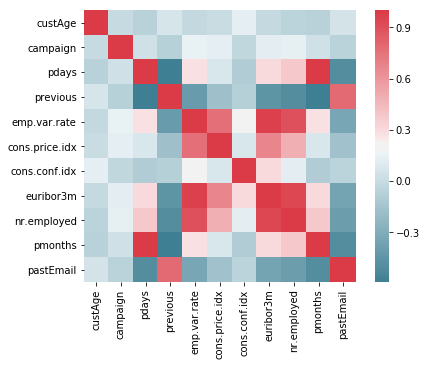

In [5]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [6]:
#Chisquare test of independence
#Save categorical variables
cat_names = ["profession", "marital", "schooling", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]

In [7]:
#loop for chi square values
for i in cat_names:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(marketing_train['responded'], marketing_train[i]))
    print(p)
    # if p < 0.05 , reject null hypothesis i.e. variables are dependent of each other (IDV & DV)
    #if p>0.05, delete variable

profession
1.0827323425870329e-29
marital
0.00017203672335513166
schooling
0.0006470983690093727
default
1.1219790857206688e-14
housing
0.5469213692385477
loan
0.22684603797058037
contact
4.416434113838791e-36
month
1.7178945184986387e-134
day_of_week
0.10949709471688404
poutcome
3.898575747043989e-181


In [8]:
marketing_train = marketing_train.drop(['pdays', 'emp.var.rate', 'day_of_week', 'loan', 'housing'], axis=1)

## Feature Scaling

In [ ]:
#df = marketing_train.copy()
#marketing_train = df.copy()

(array([3.193e+03, 0.000e+00, 0.000e+00, 0.000e+00, 1.953e+03, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 9.560e+02, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 4.770e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.450e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.790e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+02,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 6.600e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 6.100e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 3.600e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        3.800e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.100e+01,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.400e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.300e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 7.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 7.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        8.000e+00, 0.000e+00, 0.000e+0

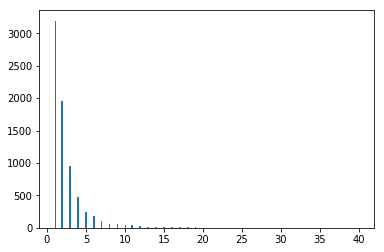

In [9]:
#Normality check
%matplotlib inline  
plt.hist(marketing_train['campaign'], bins='auto')

In [10]:
cnames = ["custAge","campaign","previous","cons.price.idx","cons.conf.idx","euribor3m","nr.employed",
           "pmonths","pastEmail"]

In [11]:
#Nomalisation
for i in cnames:
    print(i)
    marketing_train[i] = (marketing_train[i] - min(marketing_train[i]))/(max(marketing_train[i]) - min(marketing_train[i]))

custAge
campaign
previous
cons.price.idx
cons.conf.idx
euribor3m
nr.employed
pmonths
pastEmail


In [ ]:
# #Standarisation
# for i in cnames:
#     print(i)
#     marketing_train[i] = (marketing_train[i] - marketing_train[i].mean())/marketing_train[i].std()

## Sampling Techniques

In [12]:
##Simple random sampling
Sim_Sampling = marketing_train.sample(5000)

In [16]:
int(len(marketing_train)/3500)

2

In [17]:
# ##Systematic Sampling
# #Calculate the K value
k =int(len(marketing_train)/3500)

# # Generate a random number using simple random sampling
RandNum = randrange(0, 5)

# #select Kth observation starting from RandNum
Sys_Sampling = marketing_train.iloc[RandNum::k, :]

In [18]:
Sys_Sampling.head(5)

,custAge,profession,marital,schooling,default,contact,month,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
4,NaN,admin.,divorced,university.degree,no,cellular,may,0.102564,0.166667,failure,0.269680,0.192469,0.148946,0.512287,1.0,0.055556,no
6,0.223684,services,single,NaN,no,telephone,may,0.000000,0.000000,nonexistent,0.698753,0.602510,0.957153,0.859735,1.0,0.000000,yes
8,0.131579,unemployed,married,basic.9y,no,cellular,may,0.000000,0.000000,nonexistent,0.269680,0.192469,0.153933,0.512287,1.0,0.000000,no
10,NaN,admin.,married,NaN,no,cellular,aug,0.051282,0.000000,nonexistent,0.484412,0.615063,0.981864,1.000000,1.0,0.000000,no
12,0.223684,admin.,single,university.degree,no,cellular,jul,0.000000,0.000000,nonexistent,0.669135,0.338912,0.980050,1.000000,1.0,0.000000,no


In [20]:
# #Stratified sampling
from sklearn.model_selection import train_test_split

# #Select categorical variable
y = marketing_train['profession']

#select subset using stratified Sampling
Rest, Sample = train_test_split(marketing_train, test_size = 0.6, stratify = y)

In [21]:
Sample.head(5)

,custAge,profession,marital,schooling,default,contact,month,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
1863,0.473684,blue-collar,married,basic.9y,unknown,telephone,jun,0.000000,0.0,nonexistent,0.882307,0.376569,0.980957,1.000000,1.0,0.0,no
793,0.302632,entrepreneur,married,university.degree,no,telephone,may,0.230769,0.0,nonexistent,0.698753,0.602510,0.958966,0.859735,1.0,0.0,yes
3933,0.644737,retired,married,NaN,no,cellular,apr,0.000000,0.0,nonexistent,0.340608,0.154812,0.177057,0.512287,1.0,0.0,yes
2015,NaN,admin.,single,NaN,no,cellular,mar,0.000000,0.0,nonexistent,0.455183,0.669456,0.004081,0.170510,1.0,0.0,yes
6847,0.118421,admin.,married,basic.9y,no,telephone,may,0.025641,0.0,nonexistent,0.698753,0.602510,0.958966,0.859735,1.0,0.0,no


In [ ]:
#marketing_train = pd.read_csv("marketing_train_Model.csv")